In [1]:
# Import the package and data
import pandas as pd
import numpy as np 

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn 
from matplotlib import pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import tree

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('../0-data/Root_Insurance_data.csv')


In [3]:
## Data clean
## Currently Insured: categorical/unknow, N, Y
## Number of Vehicles: ordinal
## Number of Drivers: ordinal
## Marital Status: categorical/ M, S
## rank: ordinal

## There are two ways to run regressions when having categorial variables in datasets.
## 1. Delete those categorical variables.
## 2. Keep them but generate dummy variables. 
## since we don't have much features in our dataset, i would go for dummies.

## Create dummies for Currently Insured and Marital Status. 
## 1. For Currently Insured, i left "unknow" as baseline case. So Insured_N, and Insured_Y are created and included. 
## 2. For Marital Status, i left "S" as baseline case. So Married are created and included. 
## For the other variables I would treat them as ordinal.

pd.get_dummies(df['Currently Insured'])
df['Insured_N'] = pd.get_dummies(df['Currently Insured'])['N']
df['Insured_Y'] = pd.get_dummies(df['Currently Insured'])['Y']

pd.get_dummies(df['Marital Status'])
df['Married'] = pd.get_dummies(df['Marital Status'])['M']

pd.get_dummies(df['click'])
df['click_true'] = pd.get_dummies(df['click'])[True]

df.head()


,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,Insured_N,Insured_Y,Married,click_true
0,unknown,2,1,M,10.0,2,False,0,0,0,1,0
1,Y,3,1,M,10.0,5,False,0,0,1,1,0
2,Y,3,2,M,10.0,5,False,0,0,1,1,0
3,N,3,2,S,10.0,4,False,0,1,0,0,0
4,unknown,2,2,S,10.0,2,False,0,0,0,0,0


In [4]:
## define X and Y

X = df[['Insured_N', 'Insured_Y', 'Number of Vehicles', 'Number of Drivers', 'Married','rank']].copy()
X = sm.add_constant(X)
y = df['click_true'].copy()


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.2,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y)

In [10]:
# tree parameter 

random_state = 111
max_depth = 5
min_samples_split = 20


clf = tree.DecisionTreeClassifier(max_depth =max_depth,random_state=random_state,min_samples_split = min_samples_split)

In [11]:
clf = clf.fit(X_train, y_train)

[Text(150.95892857142857, 199.32, 'X[6] <= 2.5\ngini = 0.305\nsamples = 8000\nvalue = [6498, 1502]'),
 Text(62.775, 163.07999999999998, 'X[6] <= 1.5\ngini = 0.483\nsamples = 2580\nvalue = [1528, 1052]'),
 Text(29.892857142857142, 126.83999999999999, 'X[5] <= 0.5\ngini = 0.498\nsamples = 1301\nvalue = [612, 689]'),
 Text(17.935714285714287, 90.6, 'X[3] <= 2.5\ngini = 0.491\nsamples = 634\nvalue = [275, 359]'),
 Text(11.957142857142857, 54.359999999999985, 'X[2] <= 0.5\ngini = 0.489\nsamples = 597\nvalue = [255, 342]'),
 Text(5.978571428571429, 18.119999999999976, 'gini = 0.492\nsamples = 508\nvalue = [221, 287]'),
 Text(17.935714285714287, 18.119999999999976, 'gini = 0.472\nsamples = 89\nvalue = [34, 55]'),
 Text(23.914285714285715, 54.359999999999985, 'gini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(41.85, 90.6, 'X[2] <= 0.5\ngini = 0.5\nsamples = 667\nvalue = [337, 330]'),
 Text(35.871428571428574, 54.359999999999985, 'X[4] <= 1.5\ngini = 0.5\nsamples = 622\nvalue = [319, 303]')

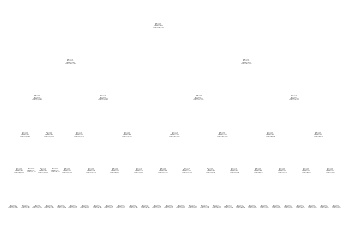

In [12]:
tree.plot_tree(clf) 

In [13]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=2c947e0cc82d102c7cbb9034e072cdd92cb17731628d68ab3b9760d3abf701d1
  Stored in directory: c:\users\xiaoliu\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [22]:

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus

# !pip install ipython

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [31]:
roc_auc

0.6306204800335395

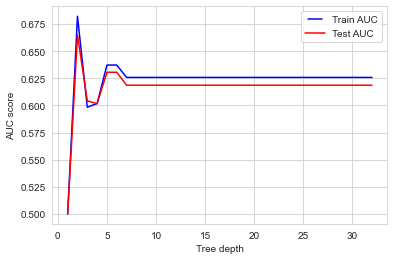

In [36]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()



# SO Accoding to AUC, best tree depth is 3???